In [1]:
import torch
from metrics import DICT_METRICS_DEPTH, RunningMetric
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def load_depth_img(path):
    img = Image.open(path)
    img_arr = np.array(img).astype(np.float32)/256
    return torch.tensor(img_arr[None, :])

KITTI_DIR = "/scratch1/ganesang/kitti/datasets"
split_file = "splits/kitti_stereo_test.txt"
with open(split_file, "r") as f:
    data = [line.strip().split(" ") for line in f]

In [3]:
idx = 5
depth_file = data[idx][1]
depth_path = os.path.join(KITTI_DIR, depth_file)
depth_fore_path = depth_path.replace("groundtruth_disp", "groundtruth_disp_fore")
depth_back_path = depth_path.replace("groundtruth_disp", "groundtruth_disp_back")
depth_raw_path = depth_path.replace("groundtruth_disp", "groundtruth_raw")
depth_clean_path = depth_path.replace("groundtruth_disp", "groundtruth_filter")

gt_disp = load_depth_img(depth_path)
gt_disp_fore = load_depth_img(depth_fore_path)
gt_disp_back = load_depth_img(depth_back_path)
depth_raw = load_depth_img(depth_raw_path)
depth_clean = load_depth_img(depth_clean_path)

In [4]:
depth_back_path

'/scratch1/ganesang/kitti/datasets/2011_09_26_drive_0059_sync/proj_depth/groundtruth_disp_back/image_02/0000000280.png'

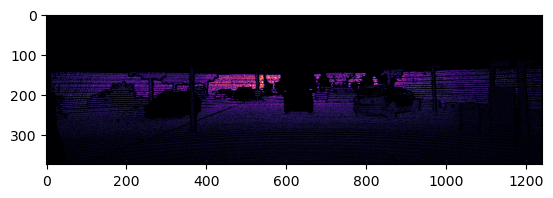

In [5]:
plt.imshow(gt_disp_back[0], cmap="magma")

In [6]:
mask_full = (gt_disp > 0) #& (depth_raw > 0)
mask_fore = (gt_disp_fore > 0) #& (depth_raw > 0)
mask_back = (gt_disp_back > 0) #& (depth_raw > 0)

num_full = torch.sum(mask_full)
num_fore = torch.sum(mask_fore)
num_back = torch.sum(mask_back)

In [7]:
num_fore+num_back, num_full, torch.sum(mask_fore & mask_back)

(tensor(100622), tensor(100622), tensor(0))

In [8]:
gt_disp[0,200:205, 400:405], gt_disp_fore[0,200:205, 400:405], gt_disp_back[0,200:205, 400:405]

(tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000, 33.1797, 33.2031,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]),
 tensor([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000, 33.1797, 33.2031,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]))

In [9]:
gt_disp[0,300:305, 600:605], gt_disp_fore[0,300:305, 600:605], gt_disp_back[0,300:305, 600:605]

(tensor([[ 0.0000,  0.0000, 10.1992,  0.0000, 10.1953],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [10.0312,  0.0000,  0.0000, 10.0508, 10.1133],
         [ 9.8711,  9.9766, 10.0078,  9.9805,  9.8828],
         [ 0.0000,  9.9375,  9.8867,  9.9375,  0.0000]]),
 tensor([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 tensor([[ 0.0000,  0.0000, 10.1992,  0.0000, 10.1953],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [10.0312,  0.0000,  0.0000, 10.0508, 10.1133],
         [ 9.8711,  9.9766, 10.0078,  9.9805,  9.8828],
         [ 0.0000,  9.9375,  9.8867,  9.9375,  0.0000]]))

In [10]:
print(num_full)
print(num_fore)
print(num_back)

tensor(100622)
tensor(11130)
tensor(89492)


(-0.5, 1241.5, 374.5, -0.5)

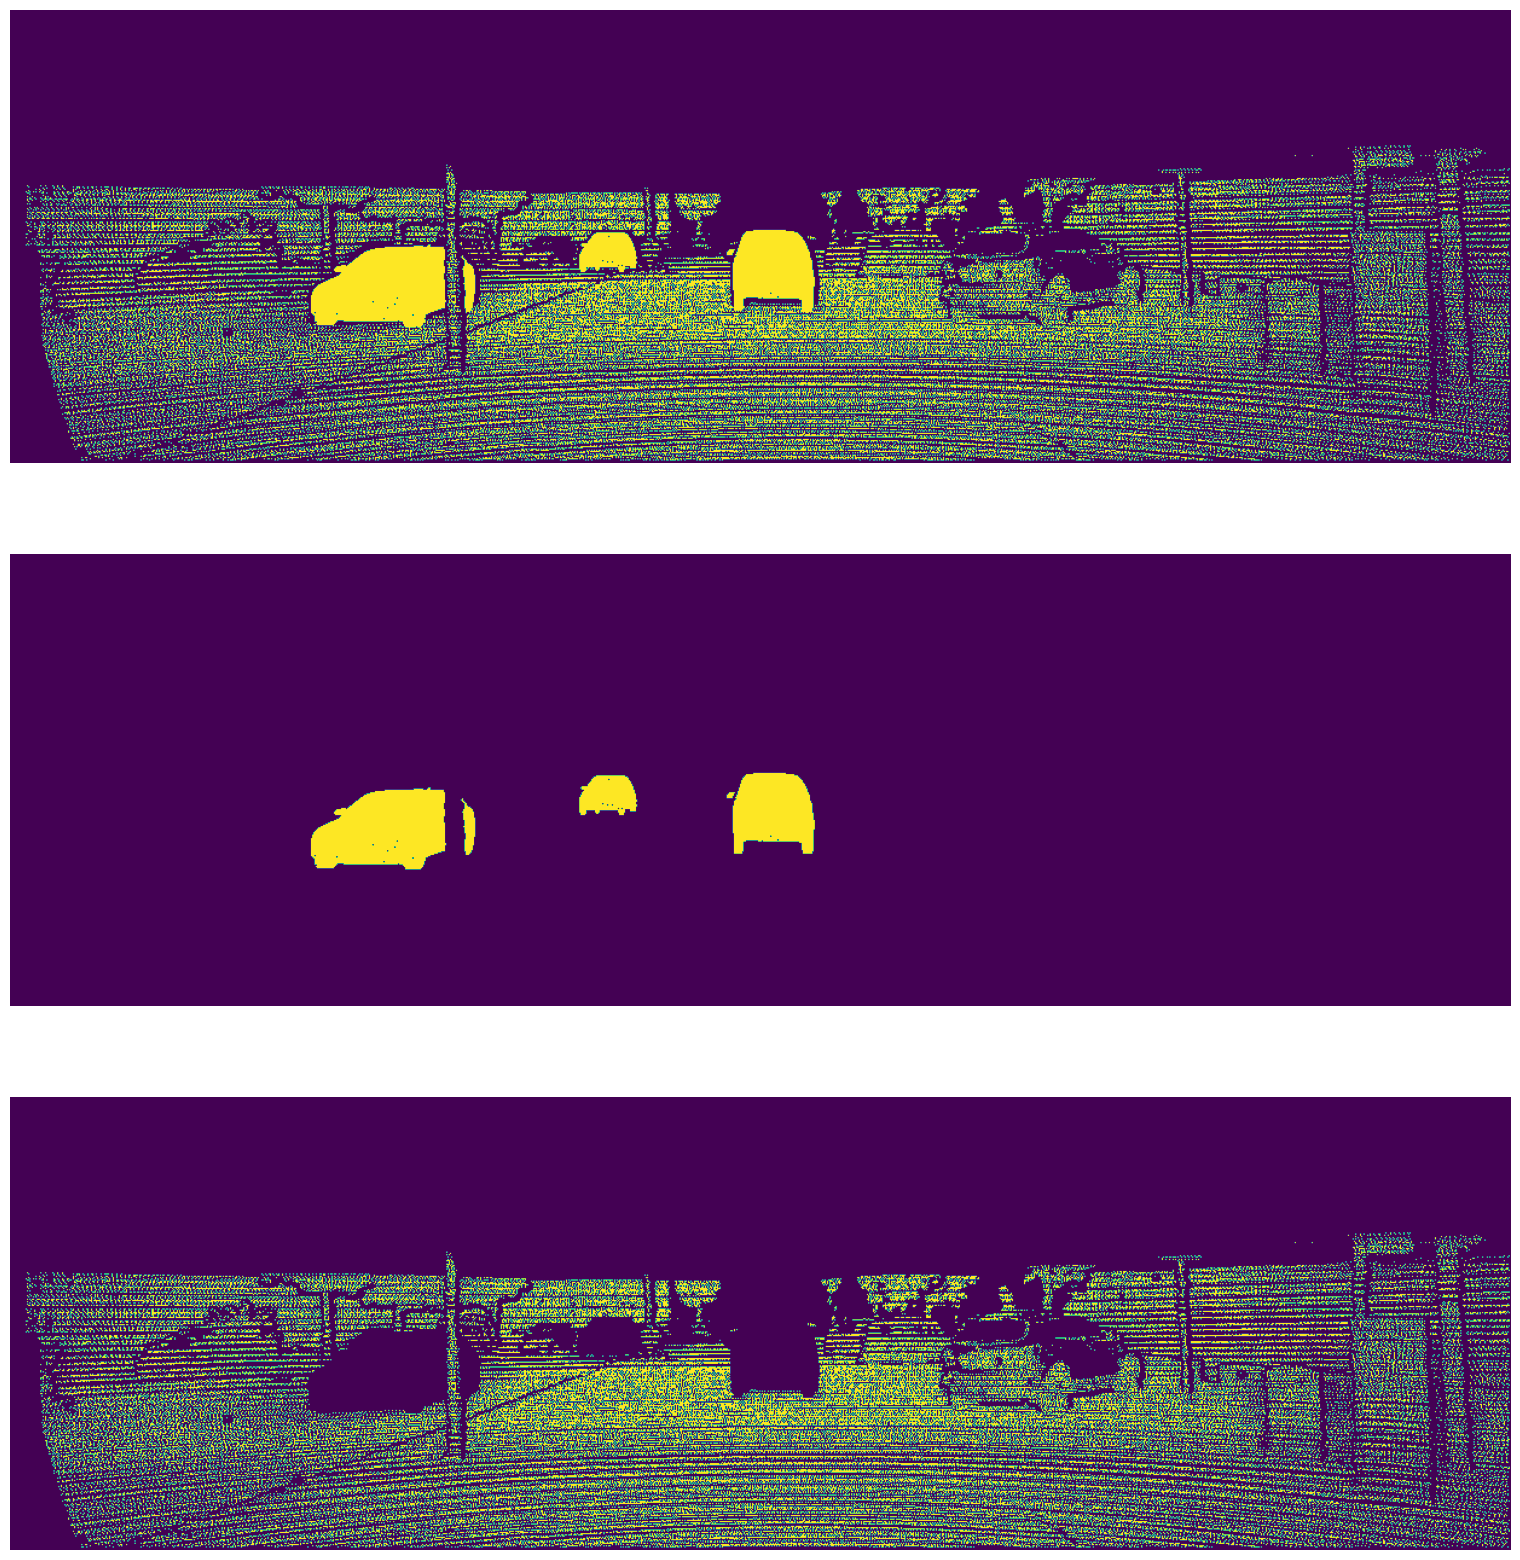

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(311)
plt.imshow(mask_full[0])
plt.axis('off')

plt.subplot(312)
plt.imshow(mask_fore[0])
plt.axis('off')

plt.subplot(313)
plt.imshow(mask_back[0])
plt.axis('off')